In [1]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.datasets import load_iris

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# START OF EXAMPLE 1

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

In [5]:
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [6]:
train, test = df[df['is_train'] == True], df[df['is_train'] == False]
features = df.columns[0:4]

In [7]:
forest = RFC(n_jobs=2, n_estimators=50)

In [8]:
y, _ = pd.factorize(train['species'])

In [9]:
forest.fit(train[features], y)
preds = iris.target_names[forest.predict(test[features])]
pd.crosstab(index=test['species'], columns=preds, rownames=['actual'], colnames=['preds'])

preds,setosa,versicolor,virginica
actual,,,
setosa,15,0,0
versicolor,0,12,0
virginica,0,2,6


In [10]:
importances = forest.feature_importances_
indices = np.argsort(importances)

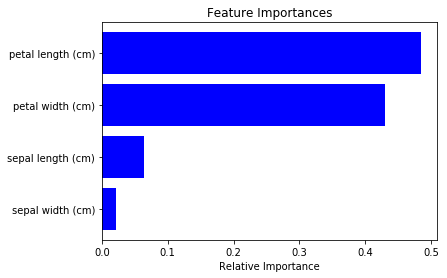

In [11]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [12]:
output_notebook()

Loading BokehJS ...

In [13]:
features[indices]

Index(['sepal width (cm)', 'sepal length (cm)', 'petal width (cm)',
       'petal length (cm)'],
      dtype='object')

In [14]:
plot = figure(plot_width = 300, plot_height = 300)
plot.hbar(y = range(len(indices)), height = 0.5, right=importances[indices], color="#CAB2D6")
show(plot)

# END OF EXAMPLE 1